PRÁTICA - Análise exploratória de conjunto de dados

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as srn
import numpy as np
import statistics as sts

In [20]:
#carregando o conjunto de dados
dados = pd.read_csv('dados.csv', sep = ';')
dados.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [4]:
#verificando o tamanho do conjunto de dados
dados.shape

(187, 4)

EXPLORAÇÃO DE DADOS

In [5]:
#explorando dados
#município
municipio = dados.groupby(['MUNICIPIO']).size()
municipio

MUNICIPIO
AGUDO                         1
AJURICABA                     1
ALECRIM                       1
ALMIRANTE TAMANDARE DO SUL    1
ALTO FELIZ                    1
AMARAL FERRADOR               1
ARVOREZINHA                   1
AUGUSTO PESTANA               1
AUREA                         1
BARAO DO COTEGIPE             1
BARRA DO RIBEIRO              1
BOSSOROCA                     1
BOZANO                        1
BRAGA                         1
BUTIA                         1
CACAPAVA DO SUL               1
CACEQUI                       1
CACHOEIRA DO SUL              1
CAIBATE                       1
CAMBARA DO SUL                1
CAMPINA DAS MISSOES           1
CANDIDO GODOI                 1
CANGUCU                       1
CAPAO DO CIPO                 1
CARLOS GOMES                  1
CATUIPE                       1
CERRO BRANCO                  2
CERRO LARGO                   1
CHUI                          1
CONDOR                        1
                             .

In [6]:
#explorando dados
#PIB
dados['PIB'].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

Text(0.5, 1.0, 'Municípios')

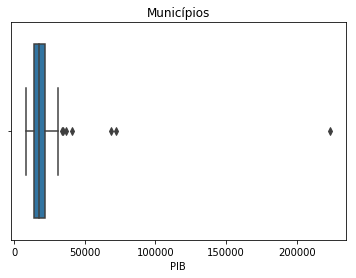

In [7]:
#plotando boxplot para melhor visualização dos dados
srn.boxplot(dados['PIB']).set_title('Municípios')

Text(0.5, 1.0, 'Municípios')

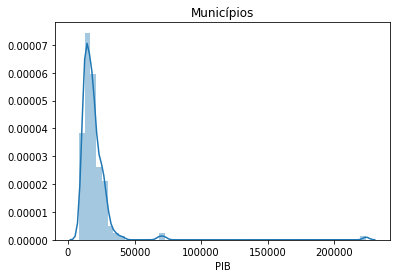

In [8]:
#plotando gráfico de distribuição para melhor visualização dos dados
srn.distplot(dados['PIB']).set_title('Municípios')

In [9]:
#explorando dados
#valor empenho
dados['VALOREMPENHO'].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

Text(0.5, 1.0, 'Municípios')

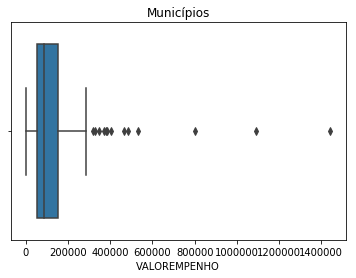

In [10]:
#plotando boxplot para melhor visualização dos dados
srn.boxplot(dados['VALOREMPENHO']).set_title('Municípios')

Text(0.5, 1.0, 'Municípios')

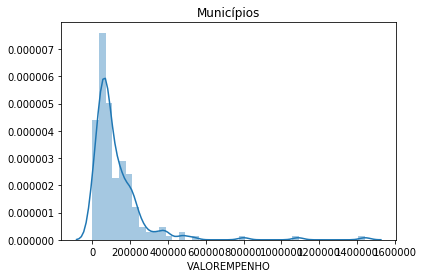

In [11]:
#plotando gráfico de distribuição para melhor visualização dos dados
srn.distplot(dados['VALOREMPENHO']).set_title('Municípios')

In [12]:
#explorando dados
#CÓDIGO
codigo = dados.groupby(['CODIGO']).size()
codigo

CODIGO
1      1
7      1
9      1
13     1
14     1
15     1
16     1
23     1
28     1
30     1
33     1
36     1
38     1
46     1
51     1
52     1
53     1
54     1
55     1
59     1
60     1
61     1
65     1
70     1
75     1
77     1
79     1
83     1
95     1
96     1
      ..
413    1
414    1
418    1
421    1
422    1
423    1
425    1
436    1
439    1
440    1
442    1
445    1
447    1
453    1
454    1
455    1
458    1
459    1
463    1
469    1
473    1
476    1
479    1
482    1
484    1
486    1
487    1
490    1
491    1
496    1
Length: 172, dtype: int64

EXTRAÇÃO DE INFORMAÇÕES DOS DADOS

In [13]:
#verificando quais os municípios com maiores PIB

dados2 = dados[['MUNICIPIO', 'PIB']]
dados2

agrup = dados2.groupby(['MUNICIPIO'])['PIB'].sum()
agrup

maxPIB = agrup.nlargest(10)
maxPIB

MUNICIPIO
TRIUNFO                      223848.22
MUITOS CAPOES                 72353.72
GARRUCHOS                     68672.25
MATO LEITAO                   44384.87
SANTA VITORIA DO PALMAR       44384.87
NOVA BOA VISTA                43186.31
SANTO ANTONIO DO PLANALTO     43186.31
SANTA CRUZ DO SUL             40671.53
CAPAO DO CIPO                 36739.78
MULITERNO                     36496.42
Name: PIB, dtype: float64

Text(0.5, 1.0, 'Os 10 municípios com maiores PIB')

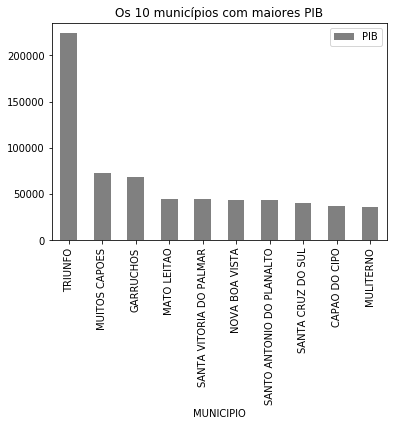

In [14]:
#plotando grafico de barras com os maiores PIBs

maxPIB.plot.bar(color = ['gray'], legend = True).set_title('Os 10 municípios com maiores PIB')

In [15]:
#verificando quais os municípios com maior empenho

dados3 = dados[['MUNICIPIO', 'VALOREMPENHO']]
dados3

agrup2 = dados3.groupby(['MUNICIPIO'])['VALOREMPENHO'].sum()
agrup2

maxEMP = agrup2.nlargest(10)
maxEMP

MUNICIPIO
TRIUNFO                    1442759.82
SANTANA DO LIVRAMENTO      1088666.10
SANTO ANGELO                800669.92
SAO GABRIEL                 533719.86
CACAPAVA DO SUL             485535.86
SAO FRANCISCO DE ASSIS      466122.80
CERRO BRANCO                416481.00
MONTE ALEGRE DOS CAMPOS     416481.00
URUGUAIANA                  401124.62
SAO LUIZ GONZAGA            385185.68
Name: VALOREMPENHO, dtype: float64

Text(0.5, 1.0, 'Os 10 municípios com maiores empenhos')

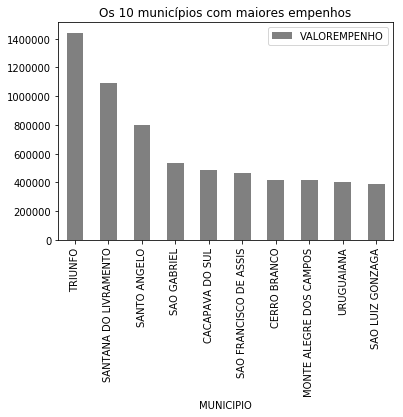

In [16]:
#plotando grafico de barras com os maiores empenhos

maxEMP.plot.bar(color = ['gray'], legend = True).set_title('Os 10 municípios com maiores empenhos')

Text(0.5, 0, 'Empenho')

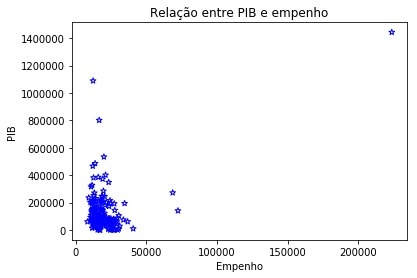

In [17]:
#verificando se existe alguma relação entre o PIB do município e o seu respectivo empenho
#plotando gráfico de dispersão
plt.scatter(dados.PIB, dados.VALOREMPENHO, color = 'blue', facecolors = 'none', marker = '*')
plt.title('Relação entre PIB e empenho')
plt.ylabel('PIB')
plt.xlabel('Empenho')

Não existe relação bem definida entre as variáveis. Ou seja, um município com PIB maior não irá acarretar, necessariamente, em um empenho mais alto.